In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
housing_dataset = pd.read_csv('/content/Housing.csv')

In [5]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:

housing_dataset = pd.get_dummies(housing_dataset, columns=['guestroom','basement','hotwaterheating','airconditioning','prefarea'], drop_first=True)
housing_dataset = pd.get_dummies(housing_dataset, columns=['mainroad'], drop_first=True)
housing_dataset = pd.get_dummies(housing_dataset, columns=['furnishingstatus'], drop_first=True)

In [7]:
X = housing_dataset.drop(columns='price',axis=1)
Y = housing_dataset['price']

In [8]:
housing_dataset

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,mainroad_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,0,0,1,1,1,0
3,12215000,7500,4,2,2,3,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,0,0,0,1,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,0,0,0,0,0,1,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [9]:
# train test split
from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test) = train_test_split(X,Y,test_size=.30,random_state=42)

In [10]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
x_train = scaler.fit_transform(x_train)

In [12]:
x_test = scaler.transform(x_test)

Importing ridge model

In [14]:
from sklearn.linear_model import Ridge

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
ridge_regressor = Ridge()
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
# cross validation
ridgeCV = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgeCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [17]:
print(ridgeCV.best_params_)

{'alpha': 30}


In [19]:
ridge_pred = ridgeCV.predict(x_test)

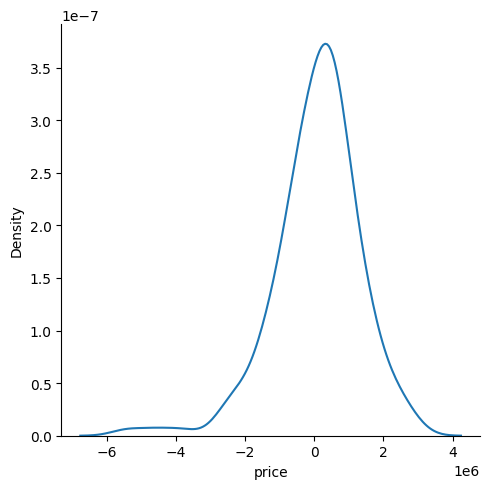

In [20]:


import seaborn as sns

sns.displot(ridge_pred-y_test,kind='kde')



In [22]:
from sklearn.metrics import r2_score
score = r2_score(ridge_pred,y_test)

In [23]:
score

0.354591640895632

Lasso regression : it is used for automatic feature selection

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso = Lasso()

In [26]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
# cross validation
lassoCV = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassoCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [27]:
print(lassoCV.best_params_)

{'alpha': 1}


In [28]:
print(lassoCV.best_score_)

-1103290813508.7036


In [29]:
lasso_pred = lassoCV.predict(x_test)

In [31]:
print(lasso_pred)

[5372313.24855413 7069236.5351708  3099294.60309995 4526448.94188866
 3281572.80290648 3589457.87317973 5728622.73489038 6422871.49980964
 2797873.58180009 2554358.5665763  9693557.30052466 2802907.00388758
 3026469.99745225 3433894.27228766 3792787.3494703  5321205.56600067
 2999855.77884977 4813307.73767223 4572078.02400787 3595737.4815258
 5605700.50537825 5838933.64024683 2730720.15676953 4837739.71717013
 5638460.93340219 7809679.667725   3347444.31992043 5328746.30803257
 8323066.89995721 3374791.35834085 6379705.35294761 3398001.81439319
 6709111.52168267 4249668.90561176 3594974.10911765 5842995.31298278
 5115479.6823982  4359422.08943063 3046573.85137878 4597377.21752119
 4784360.42290717 3411746.53690748 7048973.56054118 4062739.52634201
 3785702.86867855 4286019.90502143 6729020.65587049 4133430.26799962
 3845437.04858186 3655160.51694807 7439301.63425882 2869447.54582804
 4468814.96256838 4474335.16491861 3790095.3569385  2607548.87497907
 7484170.89111258 2912524.2719852  

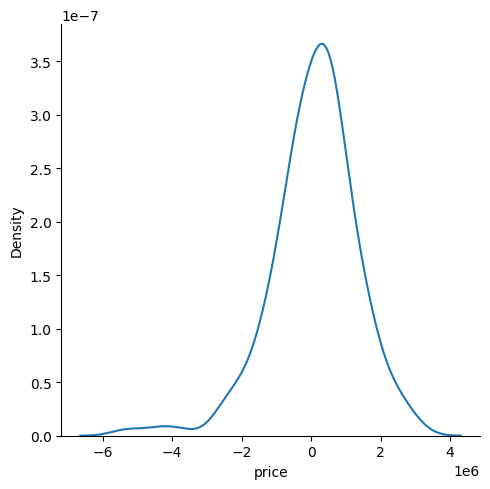

In [32]:
sns.displot(lasso_pred-y_test,kind='kde')

In [33]:
score = r2_score(lasso_pred,y_test)

In [34]:
score

0.4053179186873016